In [1]:
# Uncomment and run if you do not have these packages installed or are outdated
#!pip install scikit-learn --upgrade

# Clustering Algorithms - Hierarchical Clustering

In [2]:
from sklearn import datasets
from sklearn.metrics import adjusted_mutual_info_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')
%matplotlib notebook


We are going to use the functions that scipy provide for hierarchical agglomerative clustering. 
We will also continue working with the iris dataset

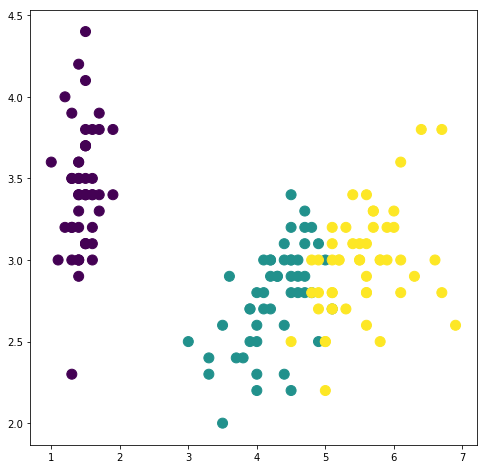

In [3]:
iris = datasets.load_iris()
plt.figure(figsize=(8,8))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=iris['target'],s=100);

From the plot we can see that the classes from the labels do not form well separated clusters, so it is going to be difficult for hierarchical clustering to discover these three clusters. 

## Single Linkage

First we apply **single linkage** clustering to the iris dataset

CPU times: user 3.61 ms, sys: 4.09 ms, total: 7.7 ms
Wall time: 19.7 ms


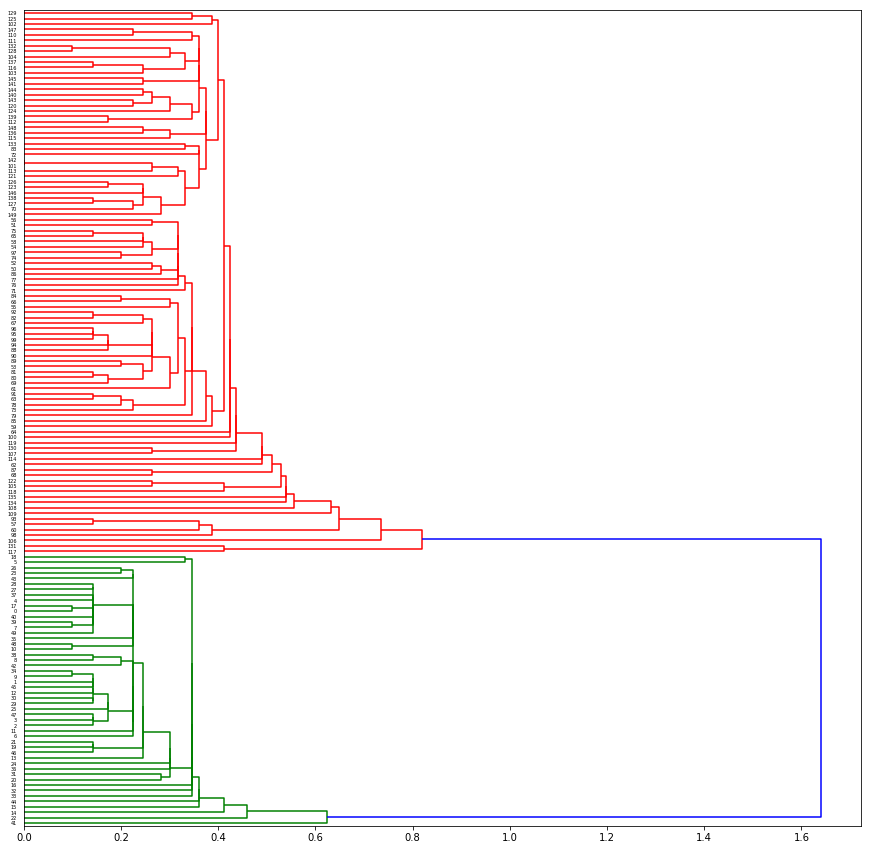

In [4]:
%time clust = linkage(iris['data'], method='single')
plt.figure(figsize=(15,15))
dendrogram(clust, distance_sort=True, orientation='right');

There is only evidence of two distinctive partitions in the dataset, some inversions also appear on the dendrogram. If we cut the dendreogram so we have tree clusters we obtain the following

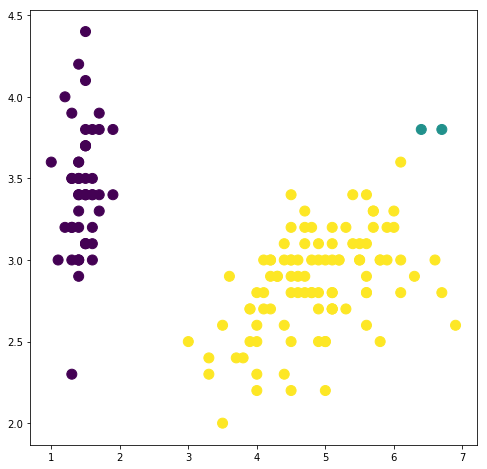

In [5]:
plt.figure(figsize=(8,8))
clabels = fcluster(clust, 3, criterion='maxclust')

plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=clabels ,s=100);

We can compare the true labels with the ones obtained using this clustering algorithm using for example the mutual information score

In [6]:
print("AMI= ", adjusted_mutual_info_score(iris['target'], clabels))

AMI=  0.5820928222202184


Not a very good result

## Complete linkage

Lets apply the **complete link** criteria to the data.

CPU times: user 1.56 ms, sys: 0 ns, total: 1.56 ms
Wall time: 1.34 ms


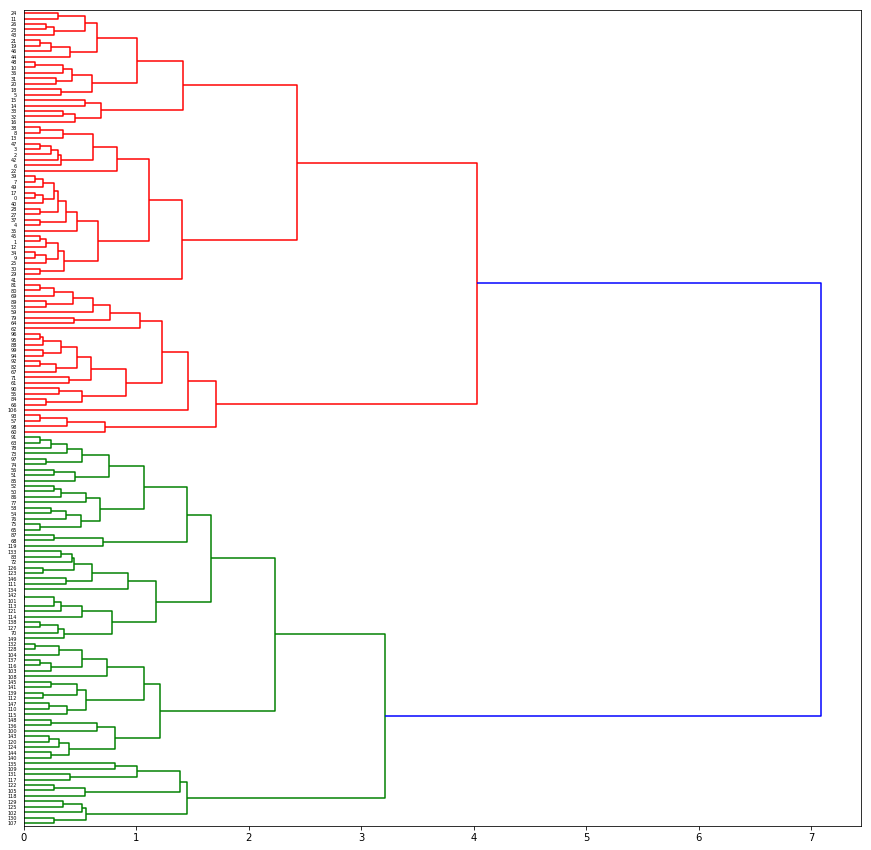

In [7]:
%time clust = linkage(iris['data'], method='complete')
plt.figure(figsize=(15,15))
dendrogram(clust, distance_sort=True, orientation='right');

Also two aparent clusters, but if we cut the dendrogram to three clusters we obtain something a little better.

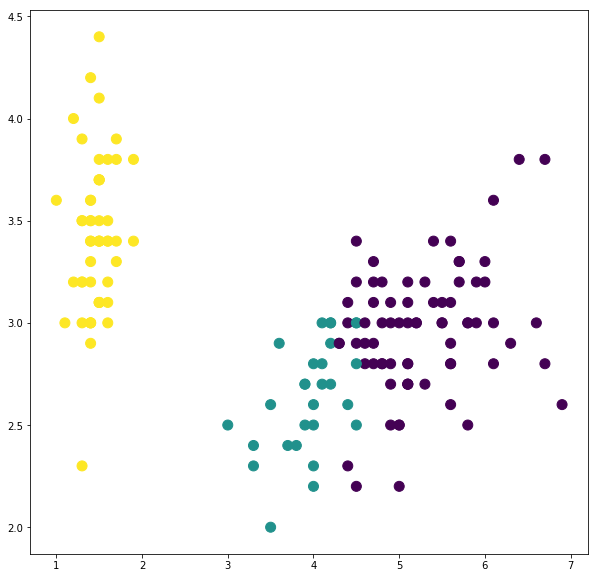

In [8]:
plt.figure(figsize=(10,10))
clabels = fcluster(clust, 3, criterion='maxclust')
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=clabels,s=100);

If we compute the mutual information score

In [9]:
print (adjusted_mutual_info_score(iris['target'], clabels))

0.6963483696671463


## Average linkage

Now we use the **average link** criteria to the data.

CPU times: user 1.11 ms, sys: 31 µs, total: 1.14 ms
Wall time: 842 µs


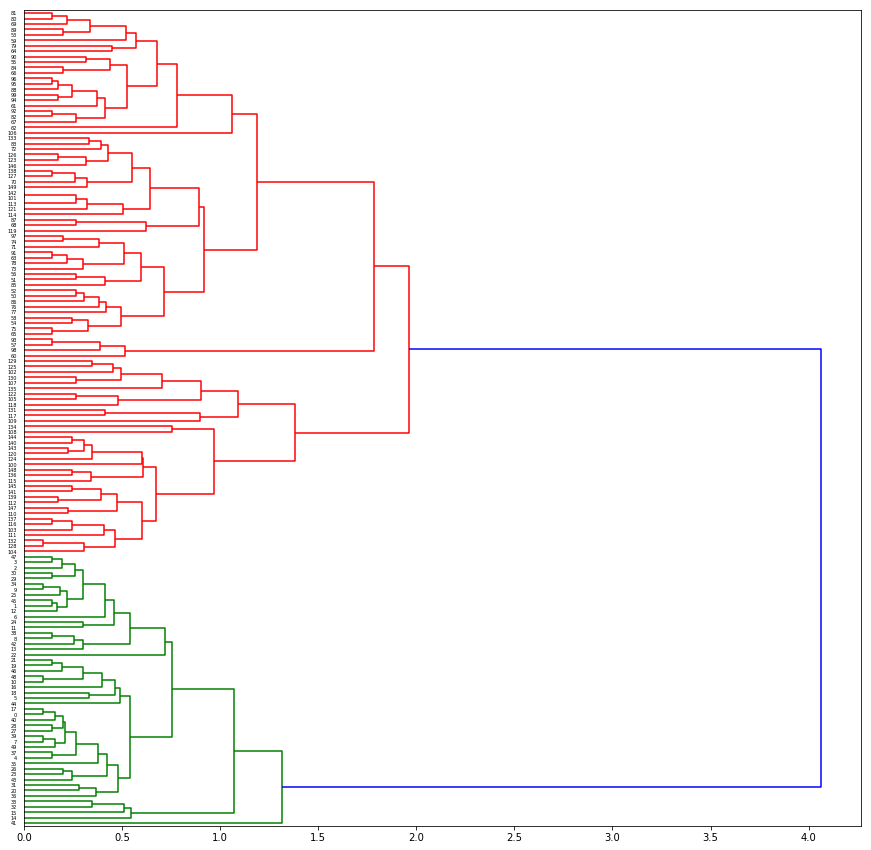

In [10]:
%time clust = linkage(iris['data'], method='average')
plt.figure(figsize=(15,15))
dendrogram(clust, distance_sort=True, orientation='right');

We cut again to obtain three classes

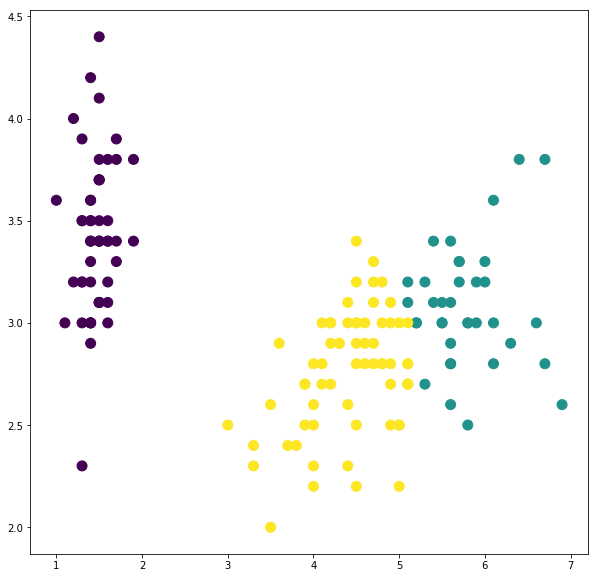

In [11]:
plt.figure(figsize=(10,10))
clabels = fcluster(clust, 3, criterion='maxclust')
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=clabels,s=100);

In this case the mutual information scores higher for this criteria.

In [12]:
print (adjusted_mutual_info_score(iris['target'], clabels))

0.7934250515435666


## Ward criterion

Now we apply the **Ward criterion** (uses the variances of the clusters)

CPU times: user 1.66 ms, sys: 179 µs, total: 1.84 ms
Wall time: 1.54 ms


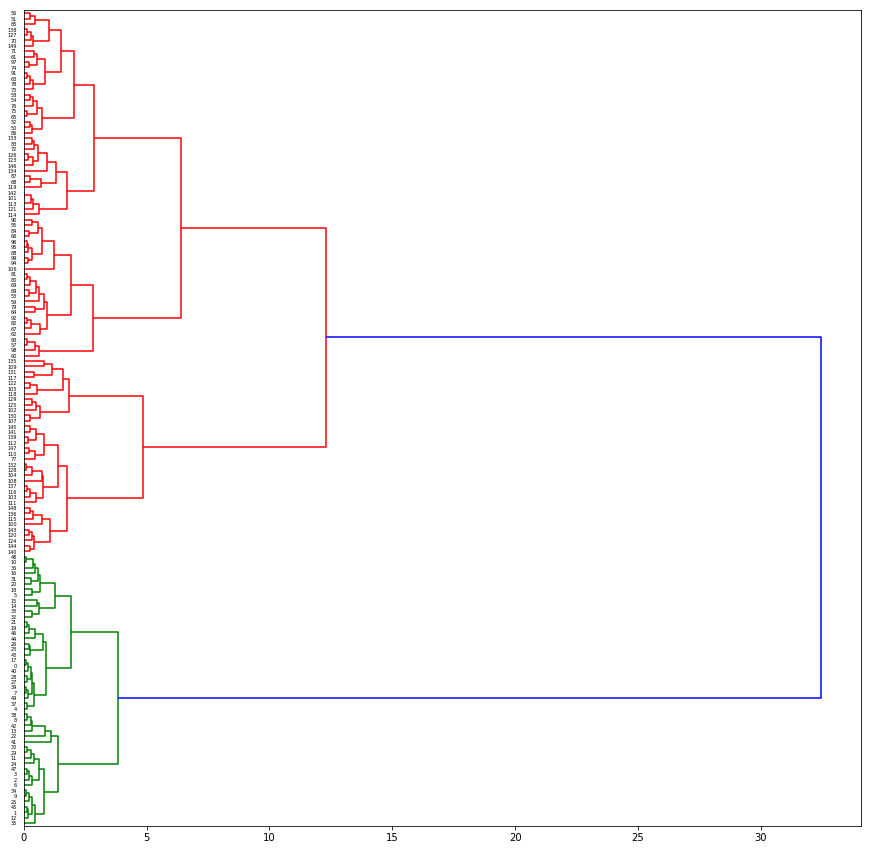

In [13]:
%time clust = linkage(iris['data'], method='ward')
plt.figure(figsize=(15,15))
dendrogram(clust, distance_sort=True, orientation='right');

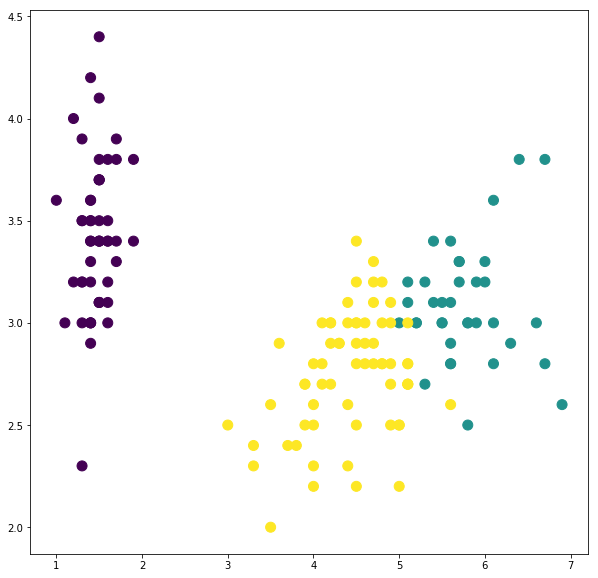

In [14]:
plt.figure(figsize=(10,10))
clabels = fcluster(clust, 3, criterion='maxclust')
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=clabels,s=100);

This criteria scores a little lower than the previous one. As we do not usually have the labels with a real unsupervise dataset we will have to use other quality criteria to decide the method to use for clustering the data.

In [15]:
print (adjusted_mutual_info_score(iris['target'], clabels))

0.7578034225092115
